In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from AST425 import *

2025-04-13 13:02:11.323438: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-13 13:02:11.324635: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 13:02:11.329399: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-13 13:02:11.344535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744563731.369722  170391 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744563731.37

In [2]:
#shape of VAE is 38, 100, 100, 2, 100, 100 38

In [3]:
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['legend.fontsize'] = 13

In [4]:
data = pd.read_csv('../tsne_umap_tutorials/data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

# data = pd.read_csv('APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

In [5]:
# Spatial:
ra = data["RA"]   #APOGEE
dec = data["DEC"]   #APOGEE

# Identification:
apogee_ID = data["# APOGEE_ID_"]   #APOGEE
gaia_ID = data["GAIAEDR3_SOURCE_ID"]  # Gaia

# Kinematic:
parallax = data["GAIAEDR3_PARALLAX"]  # Gaia
pmra = data["GAIAEDR3_PMRA"]  # Gaia
pmra_err = data["GAIAEDR3_PMRA_ERROR"]  # Gaia
pmdec = data["GAIAEDR3_PMDEC"]  # Gaia
pmdec_err = data["GAIAEDR3_PMDEC_ERROR"]  # Gaia
RV = data["VHELIO_AVG"]   #APOGEE
RV_err = data["VERR"]   #APOGEE
#dist = data["dist"]   #APOGEE no dist in this dataset?
#dist_err = data["dist_err"]   #APOGEE
jr = data["jr"]   #APOGEE
jr_err = data["jr_err"]   #APOGEE
jz = data["jz"]   #APOGEE
jz_err = data["jz_err"]   #APOGEE
#jphi = data["jphi"]   #APOGEE no jphi in this dataset?
#jphi_err = data["jphi_err"]    #APOGEE

# # Spectral (useful for filtering):
TEFF_ERR = data["TEFF_ERR"]   #APOGEE
TEFF = data["TEFF"]   #APOGEE
LOGG_ERR = data["LOGG_ERR"]   #APOGEE
LOGG = data["LOGG"]   #APOGEE
SNR = data["SNR"]   #APOGEE
ASPCAPFLAG = data["ASPCAPFLAG"]
STARFLAG = data["STARFLAG"]

# # Chemical abundances from astroNN:
FE_H = data['FE_H'] 
C_FE = data['C_FE']
CI_FE = data['CI_FE']
N_FE = data['N_FE']
O_FE = data['O_FE']
MG_FE = data['MG_FE']
AL_FE = data['AL_FE']
SI_FE = data['SI_FE']
P_FE = data['P_FE']
S_FE = data['S_FE']
K_FE = data['K_FE']
CA_FE = data['CA_FE']
TI_FE = data['TI_FE']
TIII_FE = data['TIII_FE']
V_FE = data['V_FE']
CR_FE = data['CR_FE']
MN_FE = data['MN_FE']
CO_FE = data['CO_FE']
NI_FE = data['NI_FE']

# # Chemical abundance errors from astroNN:
FE_H_err = data["FE_H_ERR"] 
C_FE_err = data['C_FE_ERR']
CI_FE_err = data['CI_FE_ERR']
N_FE_err = data['N_FE_ERR']
O_FE_err = data['O_FE_ERR']
MG_FE_err = data['MG_FE_ERR']
AL_FE_err = data['AL_FE_ERR']
SI_FE_err = data['SI_FE_ERR']
P_FE_err = data['P_FE_ERR']
S_FE_err = data['S_FE_ERR']
K_FE_err = data['K_FE_ERR']
CA_FE_err = data['CA_FE_ERR']
TI_FE_err = data['TI_FE_ERR']
TIII_FE_err = data['TIII_FE_ERR']
V_FE_err = data['V_FE_ERR']
CR_FE_err = data['CR_FE_ERR']
MN_FE_err = data['MN_FE_ERR']
CO_FE_err = data['CO_FE_ERR']
NI_FE_err = data['NI_FE_ERR']

# # Number of stars in the initial sample of APOGEE DR16: 
print("There are {} stars in our initial sample".format(len(ra)))

cols = [ra, dec, apogee_ID, gaia_ID, parallax, pmra, pmra_err, pmdec, pmdec_err, RV, RV_err, #dist, dist_err,
         jr, jr_err,# jphi, jphi_err,
        jz, jz_err, TEFF, TEFF_ERR, LOGG, LOGG_ERR, SNR, ASPCAPFLAG, STARFLAG, FE_H, FE_H_err, C_FE, 
         C_FE_err, CI_FE, CI_FE_err, N_FE, N_FE_err, O_FE, O_FE_err, MG_FE, MG_FE_err, AL_FE, AL_FE_err, SI_FE,
         SI_FE_err, P_FE, P_FE_err, S_FE, S_FE_err, K_FE, K_FE_err, CA_FE, CA_FE_err, TI_FE, TI_FE_err, TIII_FE,
         TIII_FE_err, V_FE, V_FE_err, CR_FE, CR_FE_err, MN_FE, MN_FE_err, CO_FE, CO_FE_err, NI_FE, NI_FE_err]

There are 370060 stars in our initial sample


In [6]:
ASPCAPFLAG

0             0
1             0
2             0
3         16384
4             0
          ...  
370055        0
370056    16384
370057        0
370058        0
370059        0
Name: ASPCAPFLAG, Length: 370060, dtype: int64

(Text(0.5, 0, 'Right Ascension ($\\degree$)'),
 Text(0, 0.5, 'Declination ($\\degree$)'))

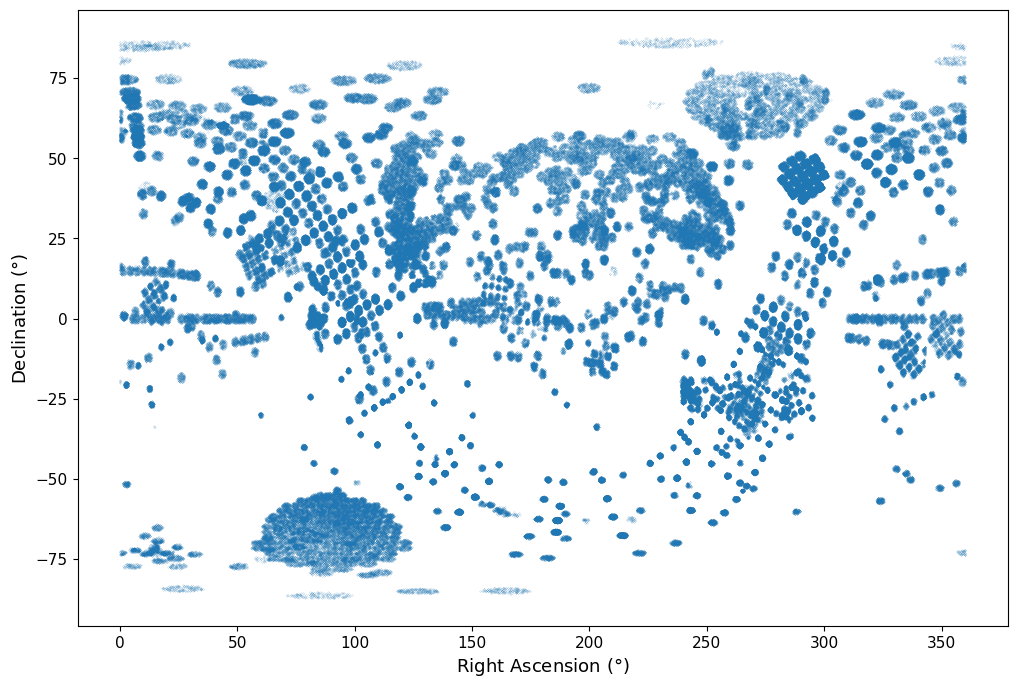

In [7]:
plt.figure(figsize = (12, 8))
plt.scatter(ra, dec, s=0.01)
plt.xlabel(r'Right Ascension ($\degree$)'), plt.ylabel('Declination ($\degree$)')
# plt.savefig('apogee_stars.png', fmt='png')

In [8]:
aspcapflags_filter = np.array(cols[20])==0
starflags_filter = np.array(cols[21])==0

filters = aspcapflags_filter*starflags_filter


filtered_data = []
for c in cols:
    a = np.array(c)[filters]
    filtered_data.append(a)
    
print("There are {} stars in our filtered sample".format(len(filtered_data[0])))

There are 144767 stars in our filtered sample


In [9]:
FE_H_filtered, C_FE_filtered, CI_FE_filtered = filtered_data[22], filtered_data[24], filtered_data[26]
N_FE_filtered, O_FE_filtered, MG_FE_filtered = filtered_data[28], filtered_data[30], filtered_data[32]
AL_FE_filtered, SI_FE_filtered, P_FE_filtered = filtered_data[34], filtered_data[36], filtered_data[38]
S_FE_filtered, K_FE_filtered, CA_FE_filtered = filtered_data[40], filtered_data[42], filtered_data[44]
TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = filtered_data[46], filtered_data[48], filtered_data[50]
CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = filtered_data[52], filtered_data[54], filtered_data[56], filtered_data[58]
RV_filtered  = filtered_data[9]

In [10]:
FE_H_err, C_FE_err, CI_FE_err = filtered_data[23], filtered_data[25], filtered_data[27]
N_FE_err, O_FE_err, MG_FE_err = filtered_data[29], filtered_data[31], filtered_data[33]
AL_FE_err, SI_FE_err, P_FE_err = filtered_data[35], filtered_data[37], filtered_data[39]
S_FE_err, K_FE_err, CA_FE_err = filtered_data[41], filtered_data[43], filtered_data[45]
TI_FE_err, TIII_FE_err, V_FE_err = filtered_data[47], filtered_data[49], filtered_data[51]
CR_FE_err, MN_FE_err, CO_FE_err, NI_FE_err = filtered_data[53], filtered_data[55], filtered_data[57], filtered_data[59]
RV_err  = filtered_data[10]

In [11]:
train_size = round(0.8 * len(filtered_data[0]))
test_size = round(0.1 * len(filtered_data[0]))
validation_size = round(0.1 * len(filtered_data[0]))

training_labels_raw = np.transpose(np.array([FE_H_filtered[:train_size], C_FE_filtered[:train_size], CI_FE_filtered[:train_size], 
                                        N_FE_filtered[:train_size], O_FE_filtered[:train_size], MG_FE_filtered[:train_size],
                                        AL_FE_filtered[:train_size], SI_FE_filtered[:train_size], P_FE_filtered[:train_size],
                                        S_FE_filtered[:train_size], K_FE_filtered[:train_size], CA_FE_filtered[:train_size],
                                        TI_FE_filtered[:train_size], TIII_FE_filtered[:train_size], V_FE_filtered[:train_size], 
                                        CR_FE_filtered[:train_size], MN_FE_filtered[:train_size], CO_FE_filtered[:train_size], NI_FE_filtered[:train_size]]))

error_training_labels_raw = np.transpose(np.array([FE_H_err[:train_size], C_FE_err[:train_size], CI_FE_err[:train_size], 
                                        N_FE_err[:train_size], O_FE_err[:train_size], MG_FE_err[:train_size],
                                        AL_FE_err[:train_size], SI_FE_err[:train_size], P_FE_err[:train_size],
                                        S_FE_err[:train_size], K_FE_err[:train_size], CA_FE_err[:train_size],
                                        TI_FE_err[:train_size], TIII_FE_err[:train_size], V_FE_err[:train_size], 
                                        CR_FE_err[:train_size], MN_FE_err[:train_size], CO_FE_err[:train_size], NI_FE_err[:train_size]]))


test_labels_raw = np.transpose(np.array([FE_H_filtered[train_size: train_size + test_size], C_FE_filtered[train_size: train_size + test_size], 
                                     CI_FE_filtered[train_size: train_size + test_size], N_FE_filtered[train_size: train_size + test_size],
                                     O_FE_filtered[train_size: train_size + test_size], MG_FE_filtered[train_size: train_size + test_size],
                                        AL_FE_filtered[train_size: train_size + test_size], SI_FE_filtered[train_size: train_size + test_size], 
                                     P_FE_filtered[train_size: train_size + test_size], S_FE_filtered[train_size: train_size + test_size], 
                                     K_FE_filtered[train_size: train_size + test_size], CA_FE_filtered[train_size: train_size + test_size],
                                        TI_FE_filtered[train_size: train_size + test_size], TIII_FE_filtered[train_size: train_size + test_size], 
                                     V_FE_filtered[train_size: train_size + test_size], CR_FE_filtered[train_size: train_size + test_size], 
                                     MN_FE_filtered[train_size: train_size + test_size], CO_FE_filtered[train_size: train_size + test_size], 
                                     NI_FE_filtered[train_size: train_size + test_size]]))
                                     
                                     
error_test_labels_raw = np.transpose(np.array([FE_H_err[train_size: train_size + test_size], C_FE_err[train_size: train_size + test_size], CI_FE_err[train_size: train_size + test_size], 
                                        N_FE_err[train_size: train_size + test_size], O_FE_err[train_size: train_size + test_size], MG_FE_err[train_size: train_size + test_size],
                                        AL_FE_err[train_size: train_size + test_size], SI_FE_err[train_size: train_size + test_size], P_FE_err[train_size: train_size + test_size],
                                        S_FE_err[train_size: train_size + test_size], K_FE_err[train_size: train_size + test_size], CA_FE_err[train_size: train_size + test_size],
                                        TI_FE_err[train_size: train_size + test_size], TIII_FE_err[train_size: train_size + test_size], V_FE_err[train_size: train_size + test_size], 
                                        CR_FE_err[train_size: train_size + test_size], MN_FE_err[train_size: train_size + test_size], CO_FE_err[train_size: train_size + test_size], NI_FE_err[train_size: train_size + test_size]]))


validation_labels_raw = np.transpose(np.array([FE_H_filtered[train_size + test_size: train_size + test_size + validation_size], C_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     CI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], N_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                     O_FE_filtered[train_size + test_size: train_size + test_size + validation_size], MG_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_filtered[train_size + test_size: train_size + test_size + validation_size], SI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     P_FE_filtered[train_size + test_size: train_size + test_size + validation_size], S_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     K_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CA_FE_filtered[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_filtered[train_size + test_size: train_size + test_size + validation_size], TIII_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     V_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CR_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     MN_FE_filtered[train_size + test_size: train_size + test_size + validation_size], CO_FE_filtered[train_size + test_size: train_size + test_size + validation_size], 
                                     NI_FE_filtered[train_size + test_size: train_size + test_size + validation_size]]))
                                     
                                     
error_validation_labels_raw = np.transpose(np.array([FE_H_err[train_size + test_size: train_size + test_size + validation_size], C_FE_err[train_size + test_size: train_size + test_size + validation_size], CI_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        N_FE_err[train_size + test_size: train_size + test_size + validation_size], O_FE_err[train_size + test_size: train_size + test_size + validation_size], MG_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        AL_FE_err[train_size + test_size: train_size + test_size + validation_size], SI_FE_err[train_size + test_size: train_size + test_size + validation_size], P_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        S_FE_err[train_size + test_size: train_size + test_size + validation_size], K_FE_err[train_size + test_size: train_size + test_size + validation_size], CA_FE_err[train_size + test_size: train_size + test_size + validation_size],
                                        TI_FE_err[train_size + test_size: train_size + test_size + validation_size], TIII_FE_err[train_size + test_size: train_size + test_size + validation_size], V_FE_err[train_size + test_size: train_size + test_size + validation_size], 
                                        CR_FE_err[train_size + test_size: train_size + test_size + validation_size], MN_FE_err[train_size + test_size: train_size + test_size + validation_size], CO_FE_err[train_size + test_size: train_size + test_size + validation_size], NI_FE_err[train_size + test_size: train_size + test_size + validation_size]]))


In [12]:
full_training_labels_raw = np.c_[training_labels_raw, error_training_labels_raw]
full_test_labels_raw = np.c_[test_labels_raw, error_test_labels_raw]
full_validation_labels_raw = np.c_[validation_labels_raw, error_validation_labels_raw]

In [13]:
full_training_labels_raw.shape, full_test_labels_raw.shape, full_validation_labels_raw.shape

((115814, 38), (14477, 38), (14476, 38))

In [14]:
np.min(full_training_labels_raw.T, axis=1), np.max(full_training_labels_raw.T, axis=1)

(array([-1.951497  , -2.1234312 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.15558027, -0.47890055, -0.15707995, -0.97891414, -0.6047195 ,
        -2.2741165 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.391077  , -0.64225805, -3.6896837 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([5.7460123e-01, 8.3517190e-01, 5.6674075e-01, 3.6616602e+00,
        5.5585840e-01, 5.1025960e-01, 4.8934165e-01, 4.5210746e-01,
        7.5247210e+00, 9.0582700e-01, 1.0242985e+00, 2.7282690e-01,
        5.9501344e-01, 8.7636330e-01, 8.6697330e-01, 3.3210137e-01,
        3.5304812e-01, 5.6587050e-01, 2.1270613e-01, 4.5790780e-01,
        1.2761971e+00, 1.6784387e+00, 1.8850280e+01, 5.6260234e-01,
        5.5715760e-01, 6.7058295

Remove unreasonably huge errors bars or unphysical abundance estimates:

In [15]:
err_threshold = 3 # remove errors that are larger than this...
err_mask_train = np.all(np.abs(full_training_labels_raw) < err_threshold, axis=1)
err_mask_test = np.all(np.abs(full_test_labels_raw) < err_threshold, axis=1)
err_mask_validation = np.all(np.abs(full_validation_labels_raw) < err_threshold, axis=1)

full_training_labels = full_training_labels_raw[err_mask_train]
full_test_labels = full_test_labels_raw[err_mask_test]
full_validation_labels = full_validation_labels_raw[err_mask_validation]

In [16]:
full_training_labels.shape, full_test_labels.shape, full_validation_labels.shape

((114885, 38), (14374, 38), (14326, 38))

In [17]:
np.min(full_training_labels.T, axis=1), np.max(full_training_labels.T, axis=1)

(array([-1.8320073 , -1.2602895 , -2.119044  , -0.18978369, -0.7124527 ,
        -0.1388877 , -0.47890055, -0.13207644, -0.97891414, -0.5242982 ,
        -0.7713039 , -0.40278423, -1.2907453 , -0.6157368 , -1.1658391 ,
        -1.0536897 , -0.64225805, -1.1330373 , -0.2965148 ,  0.01358107,
         0.01762647,  0.02378747,  0.01708818,  0.01984493,  0.02071843,
         0.02232191,  0.01871411,  0.05818468,  0.01897749,  0.03516773,
         0.02518716,  0.02486172,  0.02255343,  0.0375476 ,  0.02254345,
         0.02762588,  0.01909786,  0.02221127]),
 array([0.57460123, 0.81556314, 0.56674075, 1.5901425 , 0.5558584 ,
        0.5102596 , 0.48934165, 0.45210746, 1.0318542 , 0.905827  ,
        1.0242985 , 0.262527  , 0.59501344, 0.8763633 , 0.8669733 ,
        0.27449507, 0.35304812, 0.5658705 , 0.21270613, 0.35667247,
        0.48992783, 1.637775  , 1.0633858 , 0.46304193, 0.43964195,
        0.55135024, 0.46292186, 2.998515  , 0.55373484, 2.87389   ,
        1.0069572 , 0.7626475 , 

# SAMPLING LAYER

In [18]:
class Sampling(layers.Layer):
    """Uses (mean, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mean, log_var = inputs
        batch = tf.shape(mean)[0]
        dim = tf.shape(mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mean + tf.exp(0.5 * log_var) * epsilon

# ENCODER

Original encoder (mean/var -> mean/var)

In [19]:
# latent_dim = 2

# encoder_inputs = keras.Input(shape=(38,)) #to predict error, inputs is 38

# x = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)
# x = tf.keras.layers.Dense(100, activation='gelu')(x)

# mean = layers.Dense(latent_dim, name="mean")(x)
# log_var = layers.Dense(latent_dim, name="log_var")(x)
# # z = Sampling()([mean, log_var])
# encoder = keras.Model(encoder_inputs, [mean, log_var], name="encoder")

In [20]:
latent_dim = 2

# (38, ) code

encoder_inputs = keras.Input(shape=(38, )) #19 x 2 instead of 38, 

# mean should only depend on mean

x_mu = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs[:,:encoder_inputs.shape[1]//2])
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)

# shape of (None, latent_dim)
mean = layers.Dense(latent_dim, name="mean")(x_mu)

# variance can take in both mean and variance

# first flatten the data
# x_log_var = tf.keras.layers.Flatten()(encoder_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# shape of (None, latent_dim)
class mu_var(tf.keras.Layer):
    def call(self, x_mu, x_log_var):
        return tf.concat([x_mu, x_log_var], 1)

log_var = tf.keras.layers.Dense(latent_dim, name="log_var")(mu_var()(x_mu, x_log_var))

# mean and log var together
encoder = keras.Model(encoder_inputs, [mean, log_var], name="encoder")
encoder.summary()

# (19, 2) code (doesn't work yet, have to figure out how to get it to work)

# encoder_inputs = keras.Input(shape=(19, 2)) #19 x 2 instead of 38, 

# # 0 index slice is mu, 1 index slice is log var

# # mean should only depend on mean

# x_mu = tf.keras.layers.Dense(100, activation='gelu')(encoder_inputs[:,:,0])
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)
# x_mu = tf.keras.layers.Dense(100, activation='gelu')(x_mu)

# # shape of (None, latent_dim)
# mean = layers.Dense(latent_dim, name="mean")(x_mu)

# # variance can take in both mean and variance

# # first flatten the data
# x_log_var = tf.keras.layers.Flatten()(encoder_inputs)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# # shape of (None, latent_dim)
# log_var = layers.Dense(latent_dim, name="log_var")(tf.concat([x_mu, x_log_var], 1))

# # first reshapes mean and log var to have shape of (1, latent_dim) each and then concatenates them so they have shape of 
# # (2, latent_dim) to put in to the decoder
# encoder = keras.Model(encoder_inputs, tf.concat([tf.reshape(mean, (1, latent_dim)), tf.reshape(log_var, (1, latent_dim))], 0), name="encoder")


2025-04-13 13:02:20.955206: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 38)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 19)        │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 100)       │      2,000 │ get_item[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 100)       │      3,900 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 100)       │     10,100 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 100)       │     10,100 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 100)       │     10,100 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 100)       │     10,100 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 100)       │     10,100 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 100)       │     10,100 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_var (mu_var)     │ (None, 200)       │          0 │ dense_3[0][0],    │
│                     │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mean (Dense)        │ (None, 2)         │        202 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ log_var (Dense)     │ (None, 2)         │        402 │ mu_var[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,104 (262.12 KB)

 Trainable params: 67,104 (262.12 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Structure of old NN:
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='gelu'),
#     tf.keras.layers.Dense(100, activation='linear'),
#     tf.keras.layers.Dense(38)

# DECODER

Original decoder (mean/var -> mean/var)

In [22]:
# latent_inputs = keras.Input(shape=(2 * latent_dim,))

# x = layers.Dense(100, activation="gelu")(latent_inputs)
# x = layers.Dense(100, activation="gelu")(x)
# x = layers.Dense(100, activation="gelu")(x)
# x = layers.Dense(100, activation='gelu')(x)

# decoder_outputs = layers.Dense(38, activation="linear")(x)

# decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
# #decoder.summary()

Define shape as (19, 2) instead of (38, )

In [23]:
# (19, 2) instead of (38, ) code:

# latent_inputs = keras.Input(shape=(latent_dim, 2))

# x_mu = layers.Dense(100, activation="gelu")(latent_inputs[:,:,0])
# x_mu = layers.Dense(100, activation="gelu")(x_mu)
# x_mu = layers.Dense(100, activation="gelu")(x_mu)
# x_mu = layers.Dense(100, activation='gelu')(x_mu)

# mean_outputs = layers.Dense(19, activation="linear")(x_mu)

# # flatten again
# x_log_var = tf.keras.layers.Flatten()(latent_inputs)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
# x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

# var_outputs = layers.Dense(19, activation="linear")(tf.concat([x_mu, x_log_var], 1))

# decoder = keras.Model(latent_inputs, [mean_outputs, var_outputs], name="decoder")

# (38, ) code

class mu_var(tf.keras.Layer):
    def call(self, x_mu, x_log_var):
        return tf.concat([x_mu, x_log_var], 1)

latent_inputs = keras.Input(shape=(2 * latent_dim, ))

# again only take in mean
x_mu = layers.Dense(100, activation="gelu")(latent_inputs[:,:latent_inputs.shape[1]//2])
x_mu = layers.Dense(100, activation="gelu")(x_mu)
x_mu = layers.Dense(100, activation="gelu")(x_mu)
x_mu = layers.Dense(100, activation='gelu')(x_mu)

mean_outputs = layers.Dense(19, activation="linear")(x_mu)

x_log_var = tf.keras.layers.Dense(100, activation='gelu')(latent_inputs)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)
x_log_var = tf.keras.layers.Dense(100, activation='gelu')(x_log_var)

var_outputs = layers.Dense(19, activation="linear")(mu_var()(x_mu, x_log_var))

decoder = keras.Model(latent_inputs, [mean_outputs, var_outputs], name="decoder")
decoder.summary()

Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 2)         │          0 │ input_layer_1[0]… │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 100)       │        300 │ get_item_1[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 100)       │        500 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 100)       │     10,100 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 100)       │     10,100 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 100)       │     10,100 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 100)       │     10,100 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 100)       │     10,100 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 100)       │     10,100 │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mu_var_1 (mu_var)   │ (None, 200)       │          0 │ dense_11[0][0],   │
│                     │                   │            │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 19)        │      1,919 │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 19)        │      3,819 │ mu_var_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 67,138 (262.26 KB)

 Trainable params: 67,138 (262.26 KB)

 Non-trainable params: 0 (0.00 B)

# DEFINE VAE

In [24]:
# alpha = 1e-15  # learning rate
# # optimizer uses Adam with learning rate 1e-7
# optimizer = tf.keras.optimizers.Adam(learning_rate = alpha)

# ### CUSTOM LR SCHEDULER
# lr_start   = 1e-7
# lr_max     = 1e-4
# lr_min     = 1e-12
# lr_ramp_ep  = 3
# lr_sus_ep  = 0
# lr_decay   = 0.7
   
# def lrfn(epoch, lr_start=lr_start, lr_max=lr_max, lr_min=lr_min, lr_ramp_ep=lr_ramp_ep, lr_sus_ep=lr_sus_ep, lr_decay=lr_decay):
#     if epoch < lr_ramp_ep:
#         lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
#     elif epoch < lr_ramp_ep + lr_sus_ep:
#         lr = lr_max
#     else:
#         lr = (lr_max - lr_min) * lr_decay **(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
#     return lr

# # Using this Custom Function, create a Callback
# lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=True)

### COSINE ANNEALING

initial_lr = 1.e-4
decay_steps = int(1e5)  # total number of steps to decay over
alpha = 1.e-16          # minimum learning rate = alpha * initial_lr

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=initial_lr,
    decay_steps=decay_steps,
    alpha=alpha
)
 
def mse_loss(y_true, y_pred):
    r_loss = K.mean(K.square(y_true - y_pred), axis = [1,2,3])
    return 1000 * r_loss
 
def kl_loss(mean, log_var):
    kl_loss =  -0.5 * K.sum(1 + log_var - K.square(mean) - K.exp(log_var), axis = 1)
    return kl_loss
 
def vae_loss(y_true, y_pred, mean, var):
    r_loss = mse_loss(y_true, y_pred)
    kl_loss = kl_loss(mean, log_var)
    return  r_loss + kl_loss

Custom loss function (KL divergence):

In [25]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss") 
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            # encode
            z_mean, z_log_var = self.encoder(data)
            # decode
            # reconstruction = self.decoder(tf.concat([z_mean, z_log_var], 1))
            # currently doing univariate KL-loss in each dimension and then summing up over 19 dimensions
            
            ## KL divergence reconstruction loss:
        
            # get the mean and log variances from the original data and the reconstruction
            # data
            data_mean = data[:,:data.shape[1]//2]
            data_log_var = data[:,data.shape[1]//2:]
            # reconstruction
            rec_mean, rec_log_var = self.decoder(tf.concat([z_mean, z_log_var], 1))
            # rec_mean = reconstruction[:,:reconstruction.shape[1]//2]
            # rec_log_var = reconstruction[:,reconstruction.shape[1]//2:]       
            
            # compute the kl divergence of the reconstructed distribution (mean/var) compared to the original distribution
            # p is the reconstruction, q is the original data (p is 0, q is 1)
            # reconstruction_loss = 0.5 * (rec_log_var - data_log_var + ((tf.exp(data_log_var) + tf.square(data_mean - rec_mean))/tf.exp(rec_log_var)) - 1)
            reconstruction_loss = 0.5 * (data_log_var - rec_log_var + ((tf.exp(rec_log_var) + tf.square(rec_mean - data_mean))/tf.exp(data_log_var)) - 1)
            reconstruction_loss = tf.reduce_mean(tf.reduce_sum(reconstruction_loss, axis=1))

            ## MSE reconstruction loss:    
            
#             reconstruction_loss = tf.reduce_mean(
#                 tf.reduce_sum(
#                     keras.losses.MSE(data, reconstruction) # for custom loss, average over 1 axis, change to custom loss here
#                 )
#             )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl loss": self.kl_loss_tracker.result(),
        }

# TRAIN

Full training/testing data:

In [26]:
training_labels, error_training_labels = full_training_labels[:, :19], full_training_labels[:, 19:]
test_labels, error_test_labels = full_test_labels[:, :19], full_test_labels[:, 19:]
validation_labels, error_validation_labels = full_validation_labels[:, :19], full_validation_labels[:, 19:]

In [27]:
# for the (None, 38) shape vae

# full_train = np.c_[training_labels, 2 * np.log(error_training_labels)]  # convert to log variance
# full_test = np.c_[test_labels, 2 * np.log(error_test_labels)]

full_train = np.c_[training_labels, 2 * np.log(error_training_labels)]  # convert to log variance
full_test = np.c_[test_labels, 2 * np.log(error_test_labels)]  # convert to log variance
full_validation = np.c_[validation_labels, 2 * np.log(error_validation_labels)]  # convert to log variance

# # try this to remove some of the small variances that might make the kl term blow up
# full_train_mod = full_train[full_train[:,full_train.shape[1]//2] > np.log(1/4000)]
# 4000 based on the histograms above


# for the (19, 2) shape vae

# this gives (batch_size, 19, 2)
# full_train = np.stack((training_labels, 2 * np.log(error_training_labels)), axis=2)
# full_test = np.stack((test_labels, 2 * np.log(error_test_labels)), axis=2)

In [28]:
full_train_var = np.sort(tf.exp(full_train[:,full_train.shape[1]//2:]))

<Figure size 2000x2000 with 0 Axes>

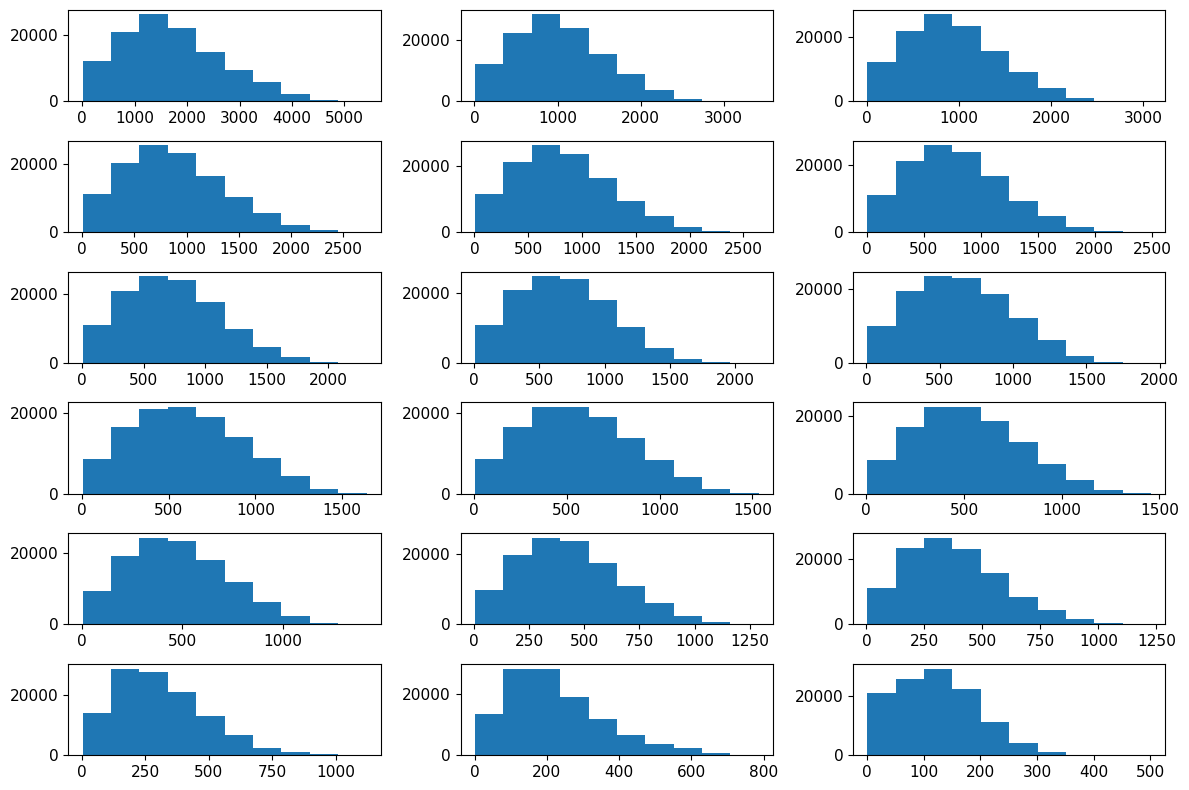

In [29]:
plt.figure(figsize = (20, 20))
fig, ax = plt.subplots(6, 3)
for i in range(6):
    for j in range(3):
        ax[i, j].hist((1/full_train_var)[:, 3*i + j])
        
plt.tight_layout()
plt.show()


Train modified VAE:

In [30]:
# vae = VAE(encoder, decoder)
# vae.compile(optimizer=keras.optimizers.Adam())
# vae.fit(full_train, epochs=5000, batch_size=256, callbacks=lr_callback)

### CHECKPOINTING:

class EpochCheckpoint(tf.keras.callbacks.Callback):
    def __init__(self, save_every=50, save_path='modified_vae_checkpoints/ckpt-epoch-{epoch:02d}.weights.h5'):
        super().__init__()
        self.save_every = save_every
        self.save_path = save_path

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.save_every == 0:
            filepath = self.save_path.format(epoch=epoch + 1)
            self.model.save_weights(filepath)
            print(f"\nCheckpoint saved at epoch {epoch + 1}")

# optimizer
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)
# VAE
vae = VAE(encoder, decoder)
vae.compile(optimizer=optimizer)
# FIT
# vae.fit(full_train, epochs=5000, batch_size=256, callbacks=lr_callback)
vae.fit(full_train, epochs=5000, batch_size=256, callbacks=[EpochCheckpoint(save_every=50)])

Epoch 1/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - kl loss: 27.2943 - reconstruction_loss: 2263.7490 - total loss: 2291.0432
Epoch 2/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 11.8714 - reconstruction_loss: 16.3587 - total loss: 28.2301
Epoch 3/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 9.0196 - reconstruction_loss: 7.0460 - total loss: 16.0656
Epoch 4/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl loss: 6.8014 - reconstruction_loss: 6.2123 - total loss: 13.0137
Epoch 5/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl loss: 5.1841 - reconstruction_loss: 5.8889 - total loss: 11.0730
Epoch 6/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 4.0018 - reconstruction_loss: 5.7168 - total loss: 9.7187
Epoch 7/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 3.0987 - reconstruction_loss: 5.6230 - total loss: 8.7217
Epoch 8/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl loss: 2.3839 - reconstruction_loss: 5.5761 - total loss: 7.9600
Ep

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7679 - total loss: 4.7758
Epoch 2124/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7901 - total loss: 4.7981
Epoch 2125/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7767 - total loss: 4.7846
Epoch 2126/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7831 - total loss: 4.7911
Epoch 2127/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7868 - total loss: 4.7948
Epoch 2128/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7765 - total loss: 4.7845
Epoch 2129/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7769 - total loss: 4.7849
Epoch 2130/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7767 - total loss: 4.7847
Epoch 21

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7799 - total loss: 4.7879
Epoch 2328/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.8105 - total loss: 4.8184
Epoch 2329/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7817 - total loss: 4.7897
Epoch 2330/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7830 - total loss: 4.7910
Epoch 2331/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0079 - reconstruction_loss: 4.7819 - total loss: 4.7898
Epoch 2332/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7834 - total loss: 4.7914
Epoch 2333/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7725 - total loss: 4.7805
Epoch 2334/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7792 - total loss: 4.7871
Epoch 23

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7859 - total loss: 4.7939
Epoch 4140/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7817 - total loss: 4.7897
Epoch 4141/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7741 - total loss: 4.7821
Epoch 4142/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7767 - total loss: 4.7847
Epoch 4143/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0079 - reconstruction_loss: 4.8036 - total loss: 4.8115
Epoch 4144/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7818 - total loss: 4.7898
Epoch 4145/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7928 - total loss: 4.8007
Epoch 4146/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7834 - total loss: 4.7914
Epoch 41

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7791 - total loss: 4.7871
Epoch 4341/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7879 - total loss: 4.7959
Epoch 4342/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7773 - total loss: 4.7852
Epoch 4343/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7760 - total loss: 4.7840
Epoch 4344/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7735 - total loss: 4.7814
Epoch 4345/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - kl loss: 0.0079 - reconstruction_loss: 4.7740 - total loss: 4.7819
Epoch 4346/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7736 - total loss: 4.7816
Epoch 4347/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0079 - reconstruction_loss: 4.7812 - total loss: 4.7891
Epoch 43

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7797 - total loss: 4.7877
Epoch 4595/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7762 - total loss: 4.7841
Epoch 4596/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7739 - total loss: 4.7818
Epoch 4597/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7847 - total loss: 4.7927
Epoch 4598/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7855 - total loss: 4.7935
Epoch 4599/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.8101 - total loss: 4.8181
Epoch 4600/5000
441/449 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7805 - total loss: 4.7885Checkpoint saved at epoch 4600
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7805 - total loss: 4

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7843 - total loss: 4.7923
Epoch 4691/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7820 - total loss: 4.7900
Epoch 4692/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7861 - total loss: 4.7941
Epoch 4693/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7872 - total loss: 4.7952
Epoch 4694/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7843 - total loss: 4.7923
Epoch 4695/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - kl loss: 0.0079 - reconstruction_loss: 4.7825 - total loss: 4.7904
Epoch 4696/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7684 - total loss: 4.7764
Epoch 4697/5000
449/449 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - kl loss: 0.0080 - reconstruction_loss: 4.7795 - total loss: 4.7875
Epoch 46

In [31]:
# save the model?
encoder.save('encoder_modified_vae.keras', overwrite=True)#, save_format='tf')
decoder.save('decoder_modified_vae.keras', overwrite=True)#, save_format='tf')

In [32]:
testmean, testvar = encoder(full_test)
test_reconstruction_mean, test_reconstruction_var = decoder(tf.concat([testmean, testvar], 1))
# assemble them into one array
test_reconstruction = np.concatenate((test_reconstruction_mean, test_reconstruction_var), axis = 1)

full_test, test_reconstruction_mean, test_reconstruction_var

(array([[-0.07695674,  0.03851429,  0.02999537, ..., -6.73204781,
         -7.1355778 , -7.10183227],
        [ 0.20946859, -0.0718479 , -0.24214658, ..., -5.78334857,
         -6.57754964, -5.99711316],
        [-0.0951201 , -0.04670431, -0.07451318, ..., -6.77825663,
         -7.44104334, -7.05643258],
        ...,
        [-0.36147648, -0.06899452, -0.10530445, ..., -6.42142448,
         -7.10806505, -6.81706838],
        [-0.25148657,  0.01173539, -0.01594368, ..., -6.24123472,
         -6.53424857, -6.73508464],
        [ 0.11841462, -0.20050073, -0.34684598, ..., -6.19908532,
         -6.27260207, -6.60383748]]),
 <tf.Tensor: shape=(14374, 19), dtype=float32, numpy=
 array([[-0.07044911,  0.0271573 , -0.01467556, ..., -0.01025118,
          0.08369114,  0.02476862],
        [ 0.21386509, -0.08264753, -0.15914954, ...,  0.07743135,
          0.0755422 ,  0.02606217],
        [-0.09836979, -0.02705144, -0.0725457 , ..., -0.00773588,
          0.05720638,  0.01328068],
        ...,


# PLOTS

Residuals:

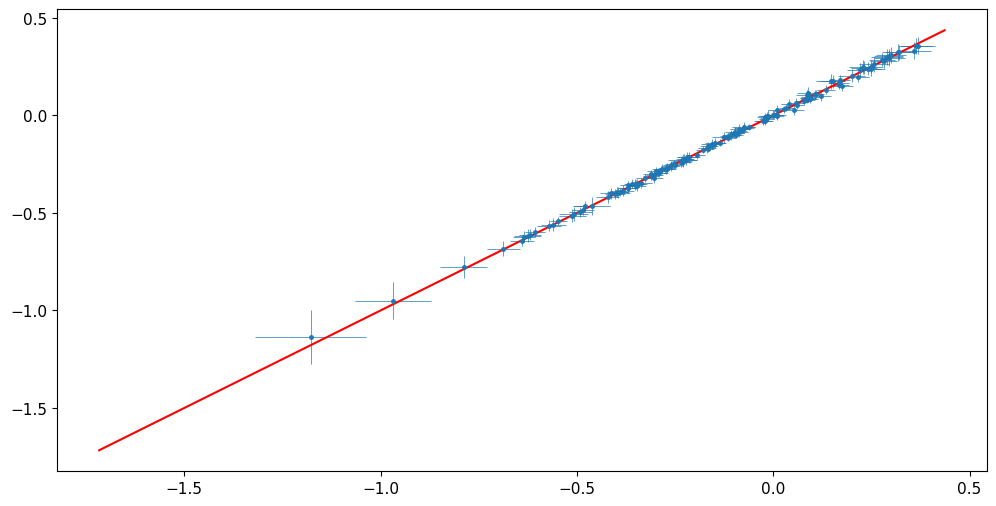

In [33]:
ind = 0  # 19 parameters, 0 to 18
samp_rate = 100

plt.figure(figsize = (12, 6))
plt.errorbar(full_test[:,ind][::samp_rate], test_reconstruction[:,ind][::samp_rate], xerr=np.exp(full_test[:,ind+19][::samp_rate]/2), yerr=np.exp(test_reconstruction[:,ind+19][::samp_rate]/2), fmt='.', markersize=5, elinewidth=0.5)
# plt.plot(np.linspace(0., 0.3, int(1e4)), np.linspace(0., 0.3, int(1e4)), c='r')
plt.plot(np.linspace(np.min(full_test[:,ind]), np.max(full_test[:,ind]), int(1e5)), np.linspace(np.min(full_test[:,ind]), np.max(full_test[:,ind]), int(1e5)), c='r')

# plt.xlim(-0.5, 0.4)
# plt.ylim(-0.5, 0.4)

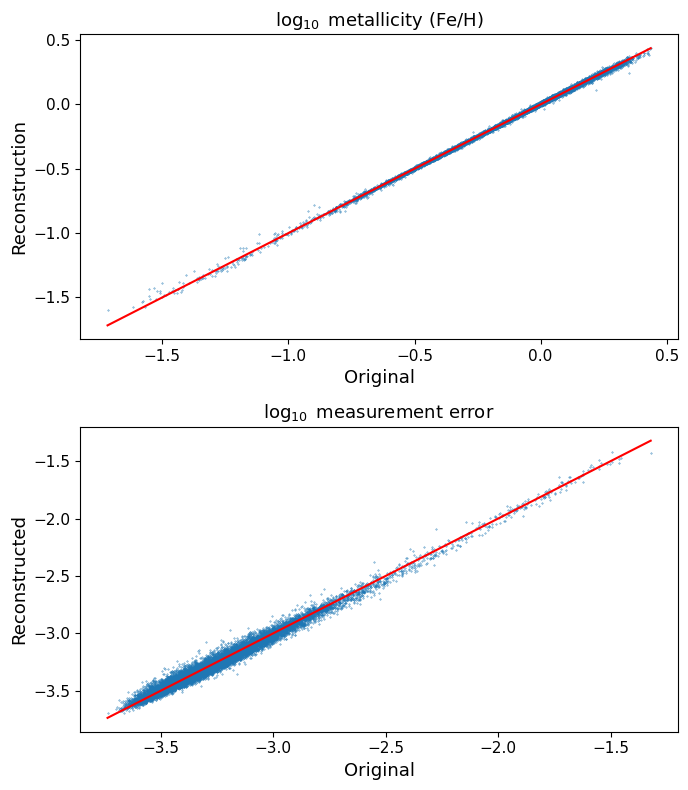

In [34]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize = (7, 8))
# plot the metallicity
ax0.scatter(full_test[:,0], test_reconstruction[:,0], s=0.1)
ax0.plot(np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), c='r')
ax0.set_xlabel('Original'), ax0.set_ylabel('Reconstruction')
ax0.set_title(r'$\log_{10}$ metallicity (Fe/H)'), ax1.set_title(r'$\log_{10}$ measurement error')
# plot the variance
ax1.scatter(np.log10(np.exp(full_test[:,19])), np.log10(np.exp(test_reconstruction[:,19])), s=0.1)
ax1.plot(np.linspace(np.log10(np.exp(np.min(full_test[:,19]))), np.log10(np.exp(np.max(full_test[:,19]))), int(1e5)), 
         np.linspace(np.log10(np.exp(np.min(full_test[:,19]))), np.log10(np.exp(np.max(full_test[:,19]))), int(1e5)), c='r')
ax1.set_xlabel('Original'), ax1.set_ylabel('Reconstructed')
plt.tight_layout()
plt.savefig('metallicity_original_vs_reconstructed_one_vertical.png')# , fmt='png')

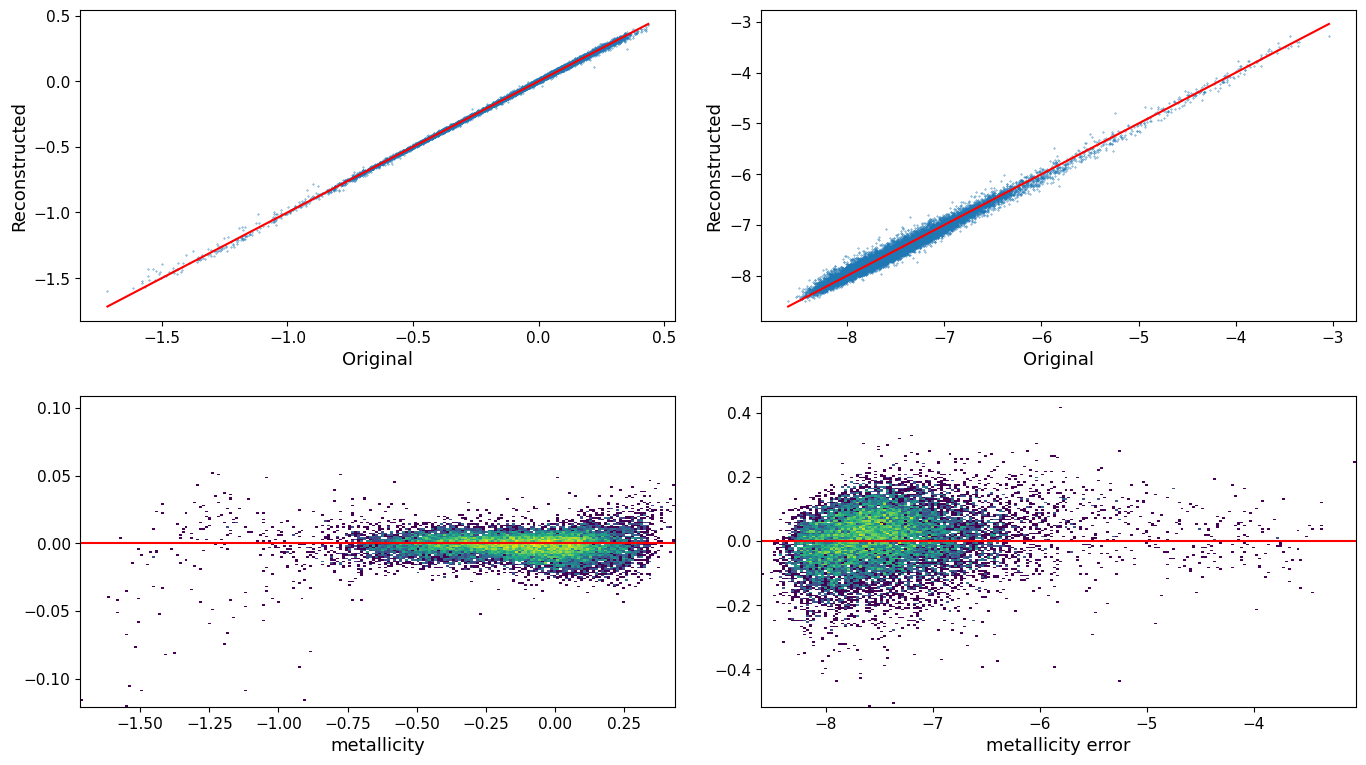

In [35]:
import matplotlib as mpl
plt.rc('font', size=18)

fig = plt.figure(figsize = (14, 8))
# ax = fig.add_subplot(111)    # The big subplot
ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

# invisible big subplot
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

# plot the metallicity
ax0.scatter(full_test[:,0], test_reconstruction[:,0], s=0.1)
ax0.plot(np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), np.linspace(np.min(full_test[:,0]), np.max(full_test[:,0]), int(1e5)), c='r')
ax0.set_xlabel('Original'), ax0.set_ylabel('Reconstructed')
# plot the variance
ax1.scatter(full_test[:,19], test_reconstruction[:,19], s=0.1)
ax1.plot(np.linspace(np.min(full_test[:,19]), np.max(full_test[:,19]), int(1e5)), np.linspace(np.min(full_test[:,19]), np.max(full_test[:,19]), int(1e5)), c='r')
ax1.set_xlabel('Original'), ax1.set_ylabel('Reconstructed')
# plot the residuals of metallicity
ax2.hist2d(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], norm=mpl.colors.LogNorm(), bins=200)
ax2.set_xlabel(r'metallicity')
# ax2.scatter(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], s=10)
ax2.axhline(0, c='r')
# plot the residuals of variance
ax3.hist2d(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], norm=mpl.colors.LogNorm(), bins=200)
# ax3.scatter(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], s=10)
ax3.axhline(0, c='r')
ax3.set_xlabel(r'metallicity error')
# ax.set_xlabel('Original'), ax.set_ylabel('Reconstructed')
plt.tight_layout()
plt.savefig('metallicity_original_vs_reconstructed_all.png')

In [36]:
np.std(full_test[:,0] - test_reconstruction[:,0])

0.009107768913685876

In [37]:
np.mean(full_test[:,0] - test_reconstruction[:,0]), np.mean(full_test[:,19] - test_reconstruction[:,19])

(-0.0016259174942578139, 0.0026339127669961823)

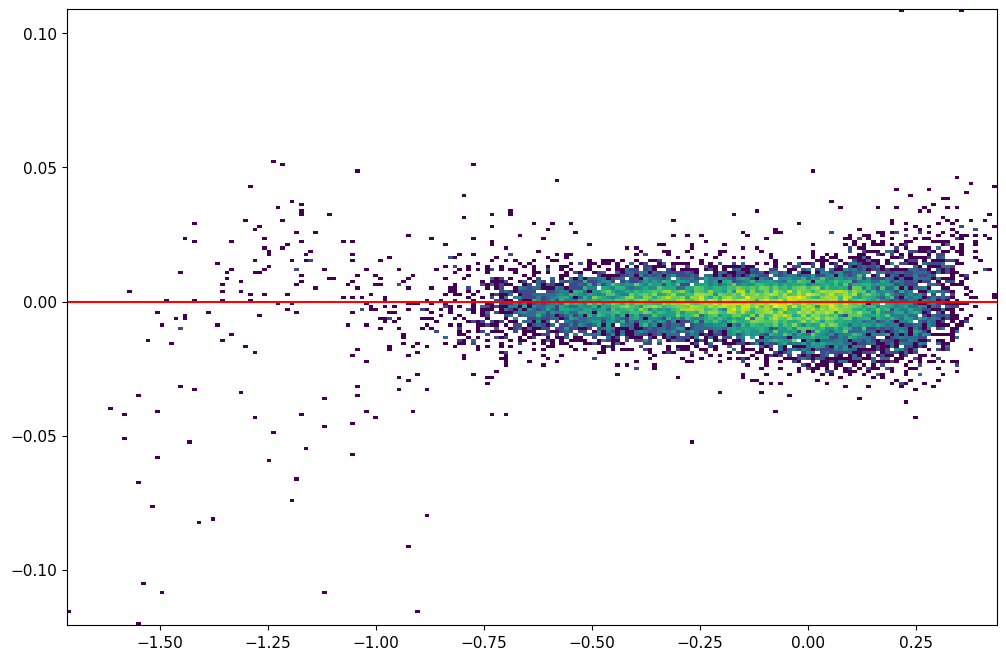

In [38]:
plt.hist2d(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], norm=mpl.colors.LogNorm(), bins=200)
# plt.scatter(full_test[:,0], full_test[:,0] - test_reconstruction[:,0], s=10)
plt.axhline(0, c='r')
# plt.savefig('residuals.png', fmt='png')
plt.show()

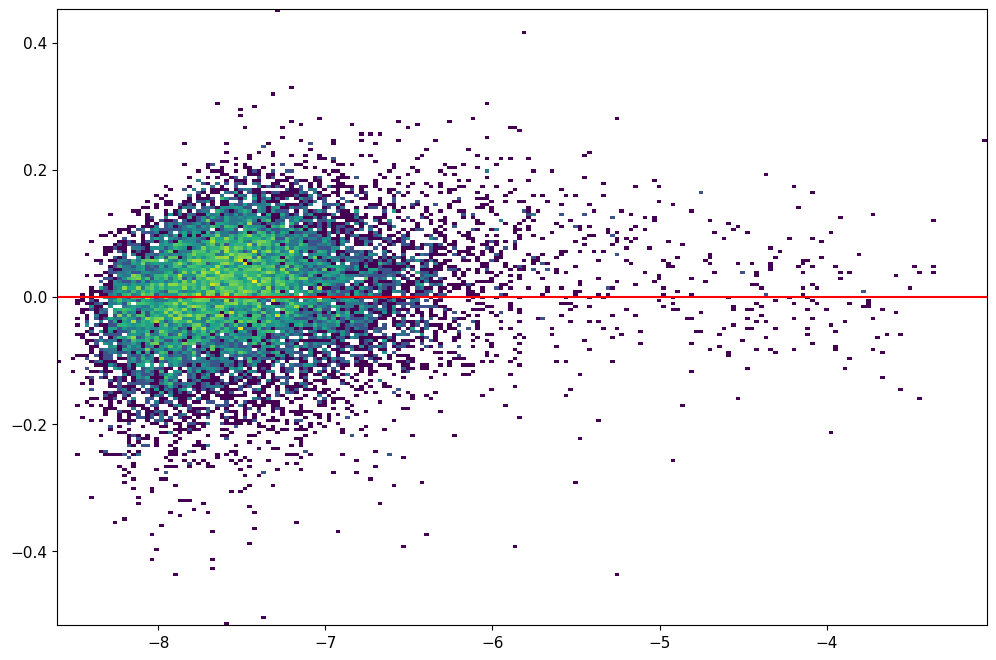

In [39]:
plt.hist2d(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], norm=mpl.colors.LogNorm(), bins=200)
# plt.scatter(full_test[:,19], full_test[:,19] - test_reconstruction[:,19], s=10)
plt.axhline(0, c='r')
plt.show()

In [40]:
test_labels.shape

(14374, 19)

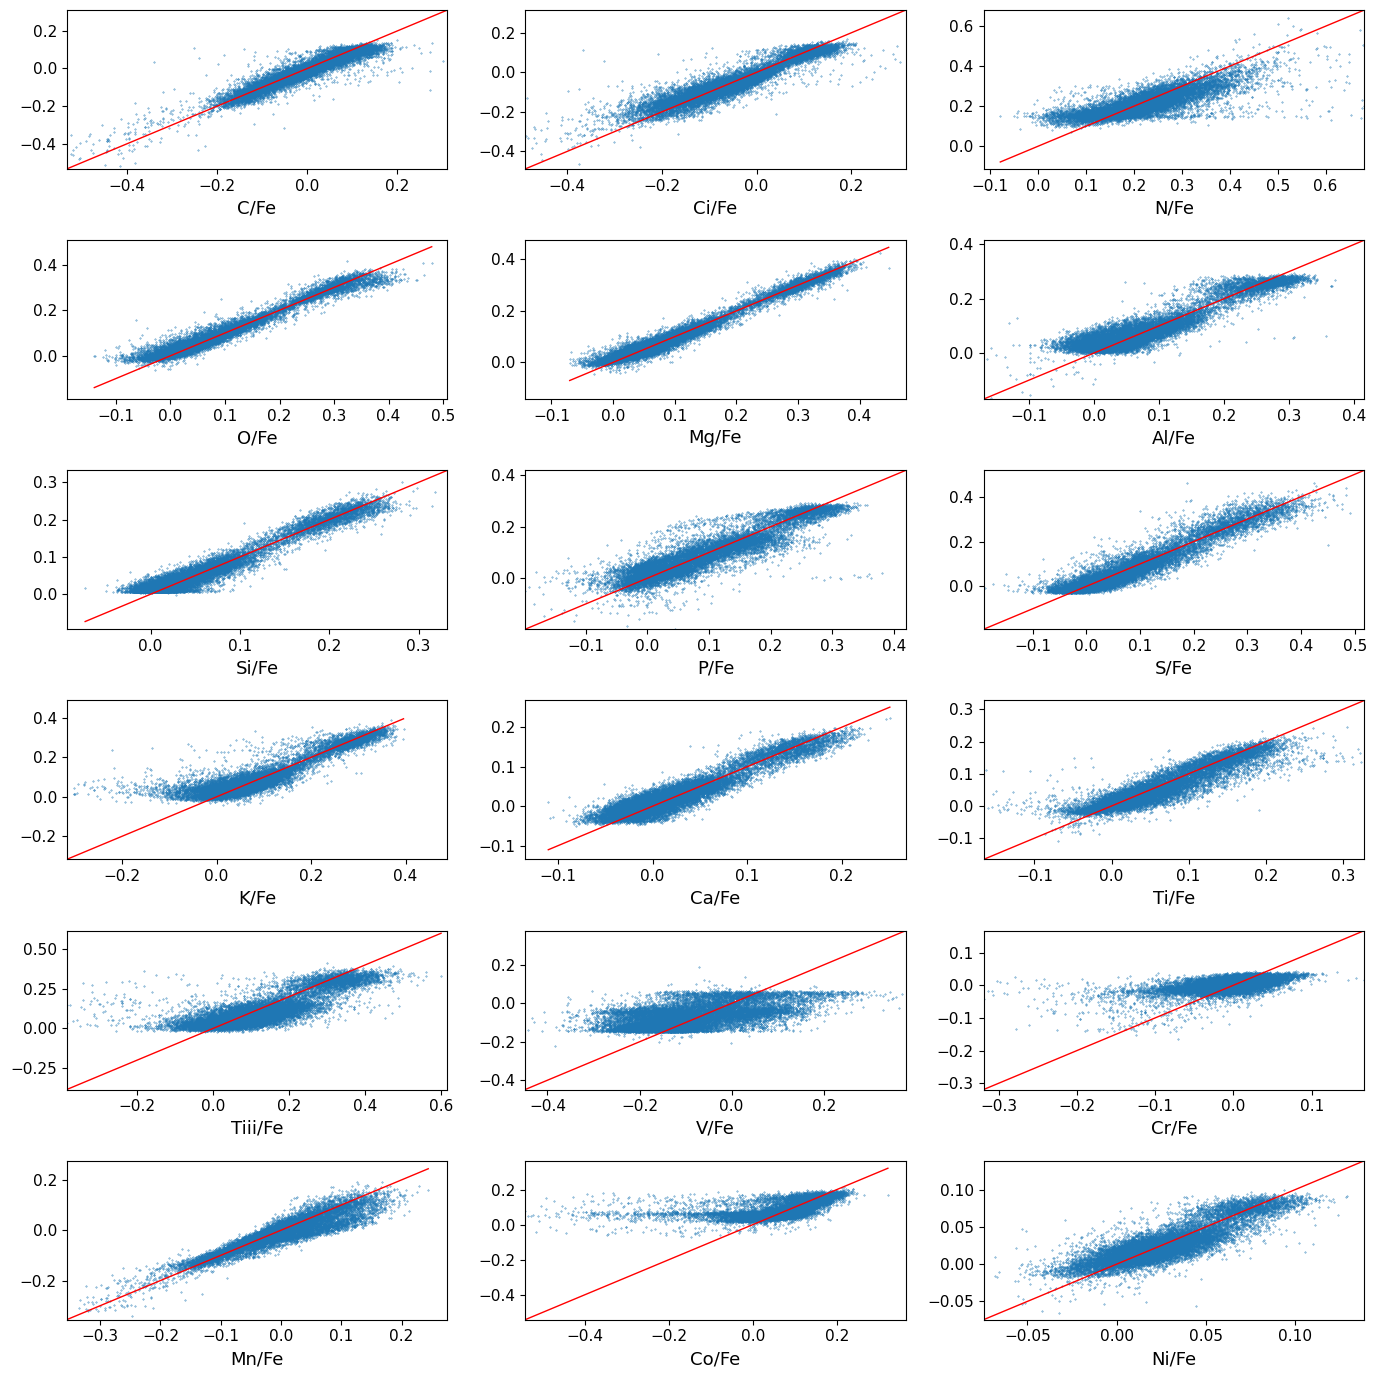

In [41]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by
samp_rate = 1

# set this to 1 to plot the measurements, 20 to plot the errors
error = 1

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
for i in range(6):
    for j in range(3):
#         ax[i, j].errorbar(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], 
#                           xerr=np.exp(full_test[:,3*i+j+error+error9][::samp_rate]/2), 
#                           yerr=np.exp(test_reconstruction[:,3*i+j+error+error9][::samp_rate]/2), 
#                           fmt='.', markersize=5, elinewidth=0.5)
        ax[i, j].scatter(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], s=0.1)
        ax[i, j].plot(np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), 
                      np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), c='r', linewidth=1)
        # label
        ax[i, j].set_xlabel(abundances[3*i+j+error])# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(full_test[:,3*i+j+error], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        
plt.tight_layout()
plt.savefig('original_vs_reconstructed_all_abundances.png')#, fmt='png')
plt.show()

In [42]:
for i in range(0, 18):
    print(np.mean(full_test[:,i] - test_reconstruction[:,i]))

-0.0016259174942578139
0.005570859347789759
6.73423626986073e-05
0.006333475773993373
-0.0053914582907954945
-0.002455770601094852
-0.006517592806898285
-0.0033680241345596666
-0.00043207654843117557
-0.0009404276347222503
-0.00986906019957228
-0.0037237058431377292
0.0035860028218907907
0.009924113408971924
-0.014260935316883737
-0.008691545068450662
0.005839125547529119
-0.021393226688444945


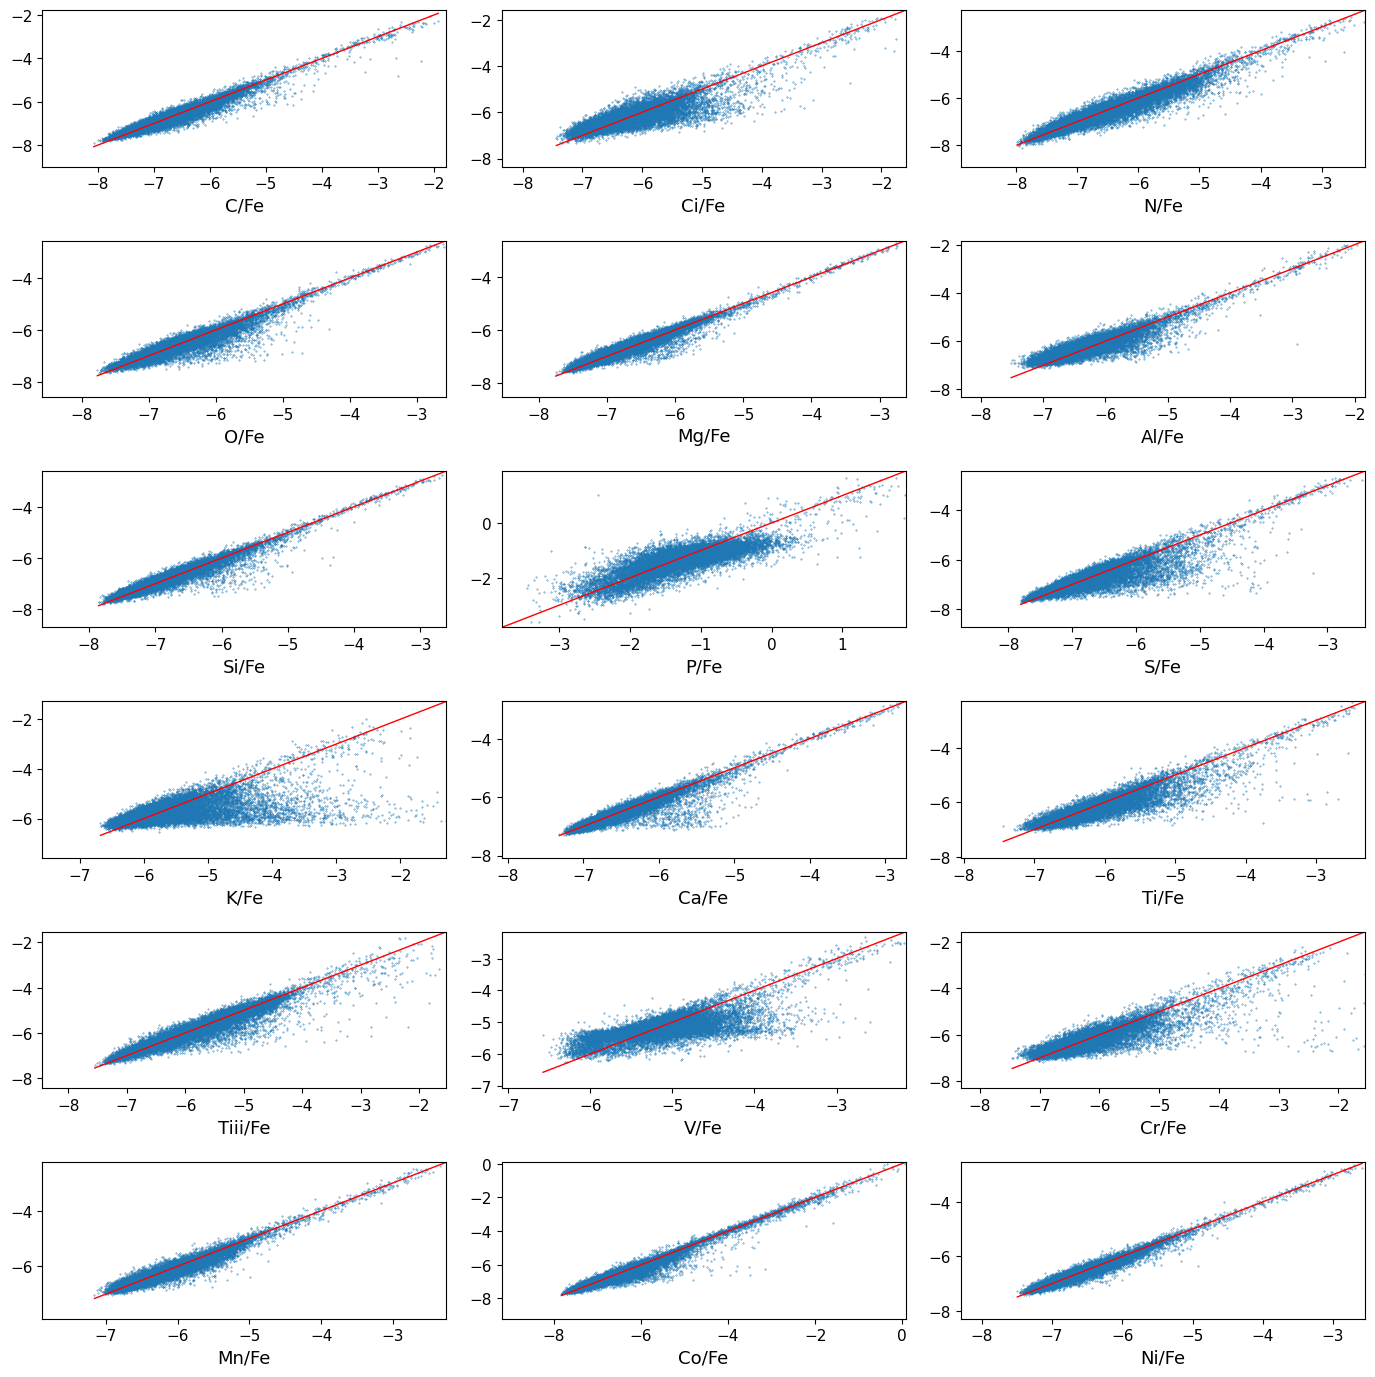

In [43]:
abundances = ['Fe/H', 'C/Fe', 'Ci/Fe', 'N/Fe', 'O/Fe', 'Mg/Fe', 'Al/Fe', 'Si/Fe', 'P/Fe', 'S/Fe', 'K/Fe', 'Ca/Fe', 'Ti/Fe', 'Tiii/Fe', 'V/Fe', 'Cr/Fe', 'Mn/Fe', 'Co/Fe', 'Ni/Fe']
divisor = 4  # fraction of the range to scale the plots by
samp_rate = 1

# set this to 1 to plot the measurements, 20 to plot the errors
error = 20

plt.rc('font', size=14)
fig, ax = plt.subplots(6, 3, figsize=(14, 14))
for i in range(6):
    for j in range(3):
#         ax[i, j].errorbar(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], 
#                           xerr=np.exp(full_test[:,3*i+j+error+error9][::samp_rate]/2), 
#                           yerr=np.exp(test_reconstruction[:,3*i+j+error+error9][::samp_rate]/2), 
#                           fmt='.', markersize=5, elinewidth=0.5)
        ax[i, j].scatter(full_test[:,3*i+j+error][::samp_rate], test_reconstruction[:,3*i+j+error][::samp_rate], s=0.1)
        ax[i, j].plot(np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), 
                      np.linspace(np.min(full_test[:,3*i+j+error]), np.max(full_test[:,3*i+j+error]), int(1e5)), c='r', linewidth=1)
        # label
        ax[i, j].set_xlabel(abundances[3*i+j+1])# , ax[i, j].set_ylabel('Reconstructed')       
        # scale it properly based on reconstruction
        abundance_min, abundance_max = np.quantile(full_test[:,3*i+j+error], (0.005, 0.995))
        # abundance_min = np.min(test_reconstruction[:, 3*i + j])
        # abundance_max = np.max(test_reconstruction[:, 3*i + j])
        diff = np.abs(abundance_max - abundance_min)
        # scale it
        ax[i, j].set_xlim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        ax[i, j].set_ylim(abundance_min - diff/divisor, abundance_max + diff/divisor) 
        
plt.tight_layout()
plt.savefig('original_vs_reconstructed_all_errors.png')#, fmt='png')
plt.show()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-7.31504539, -7.29069736, -7.26634933, -7.2420013 , -7.21765328,
        -7.19330525, -7.16895722, -7.14460919, -7.12026116, -7.09591313,
        -7.0715651 , -7.04721707, -7.02286904, -6.99852101, -6.97417298,
        -6.94982495, -6.92547692, -6.9011289 , -6.87678087, -6.85243284,
        -6.82808481, -6.80373678, -6.77938875, -6.75504072, -6.73069269,
        -6.70634466, -6.68199663, -6.6576486 , -6.63330057, -6.60895254,
        -6.58460451, -6.56025649, -6.53590846, -6.51156043, -6.4872124 ,
        -6.46286437, -6.43851634, -6.41416831, -6.38982028, -6.36547225,
        -6.34112422, -6.31677619, -6.29242816, -6.26808013, -6.2437321 ,
        -6.21938408, -6.19503605, -6.17068802, -6.14633999, -6.12199196,
        -6.09764393, 

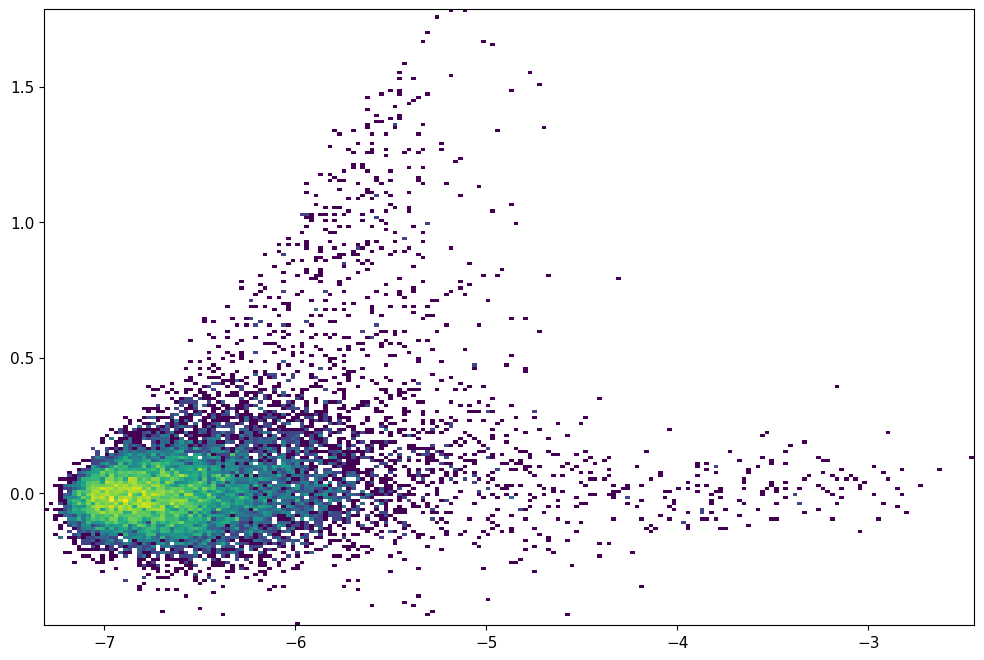

In [44]:
plt.hist2d(full_test[:,30], full_test[:,30] - test_reconstruction[:,30], norm=mpl.colors.LogNorm(), bins=200)

In [45]:
for i in range(19, 38):
    print(np.mean(full_test[:,i] - test_reconstruction[:,i]))

0.0026339127669961823
0.011963507575149235
0.009488083450949316
0.04542083544593426
0.04201199206073987
-0.013988186428649147
-0.058536077717351837
-0.008124657427332533
0.08294948162960965
0.06630310616710945
0.19750815666035992
0.03622787250874081
0.07993798984739309
0.052701998174070036
0.04741172284118857
0.06294329964959977
0.025789317265648502
0.04274024668616353
0.01757752582992587


2D means of latent space points with errorbars given by their corresponding variances and coloured by some abundance:

ValueError: 'xerr' must not contain negative values

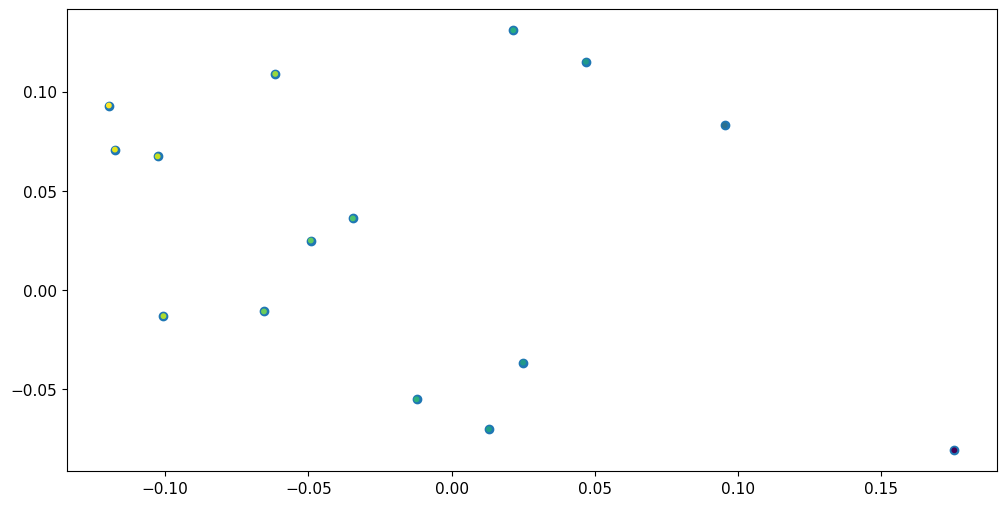

In [46]:
ind = 0  # index of parameter to colour by

plt.figure(figsize = (12, 6))
plt.scatter(testmean[:,0][::1000], testmean[:,1][::1000], c=full_test[:,ind][::1000], s=10, zorder=2)
plt.errorbar(testmean[:,0][::1000], testmean[:,1][::1000], xerr=testvar[:,0][::1000], yerr=testvar[:,1][::1000], fmt='o', zorder=1)